# Task 1

### Імпортування бібліотек

In [1]:
import random
import matplotlib.pyplot as plt

### Крок 1: Генерація чисел

Ми використаємо random.randint(0, 100), щоб створити 20 випадкових чисел.

In [2]:
# Генеруємо 20 випадкових чисел від 0 до 100
heights = [random.randint(0, 100) for _ in range(20)]
print(heights)  # Друкуємо список для перевірки

[51, 91, 88, 18, 45, 98, 75, 21, 46, 61, 95, 84, 30, 56, 16, 2, 17, 52, 29, 80]


### Крок 2: Побудова графіка висот

Використаємо matplotlib для побудови графіка.

**Цей код:**

* З'єднує висоти лініями.

* Додає підписи значень над точками.

* Результат — графік, схожий на профіль гір.



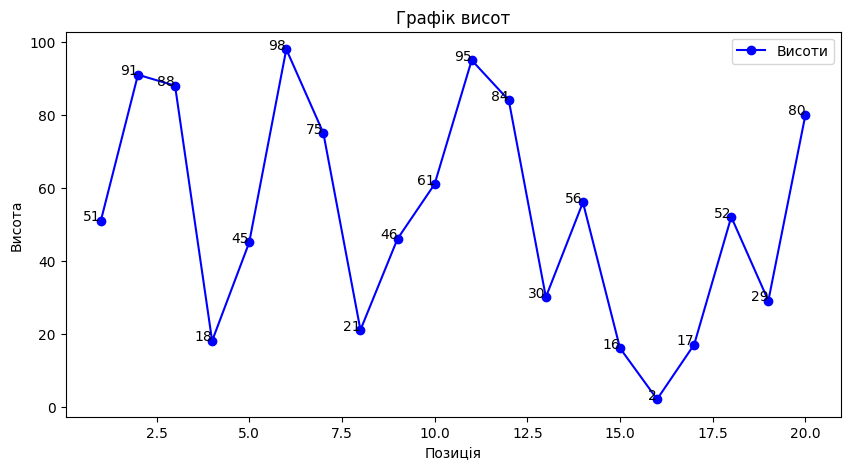

In [3]:
import matplotlib.pyplot as plt

# Створюємо список індексів (по осі X)
x = list(range(1, 21))

# Будуємо графік
plt.figure(figsize=(10, 5))
plt.plot(x, heights, marker='o', linestyle='-', color='blue', label='Висоти')

# Додаємо підписи до точок
for i, h in enumerate(heights):
    plt.text(i+1, h, str(h), fontsize=10, ha='right')

plt.xlabel("Позиція")
plt.ylabel("Висота")
plt.title("Графік висот")
plt.legend()
plt.show()

### Крок 3: Пошук найглибшого озера

Щоб знайти озеро:

1) Знайдемо всі западини (min між двома вищими значеннями).

2) Визначимо найглибше.

**Алгоритм:**

1) Пройдемо по списку і шукаємо пари [гірська вершина → западина → гірська вершина].

2) Обчислимо глибину як min(ліва вершина, права вершина) - найнижча точка.

3) Визначимо максимальну глибину.

In [4]:
def find_deepest_lake(heights):
    max_depth = 0
    best_lake = None

    for i in range(1, len(heights) - 1):  # Починаємо з другої точки і йдемо до передостанньої
        left = heights[i - 1]
        center = heights[i]
        right = heights[i + 1]

        # Перевіряємо, чи це западина
        if left > center and right > center:
            depth = min(left, right) - center
            if depth > max_depth:
                max_depth = depth
                best_lake = (i - 1, i, i + 1)  # Індекси найглибшого озера

    return max_depth, best_lake

#### Перевірка

In [5]:
deepest_depth, lake_indexes = find_deepest_lake(heights)
print("Глибина найглибшого озера:", deepest_depth)
print("Індекси:", lake_indexes)

Глибина найглибшого озера: 27
Індекси: (2, 3, 4)


### Крок 4: Візуалізація найглибшого озера

Щоб виділити найглибше озеро, змінимо колір ліній:

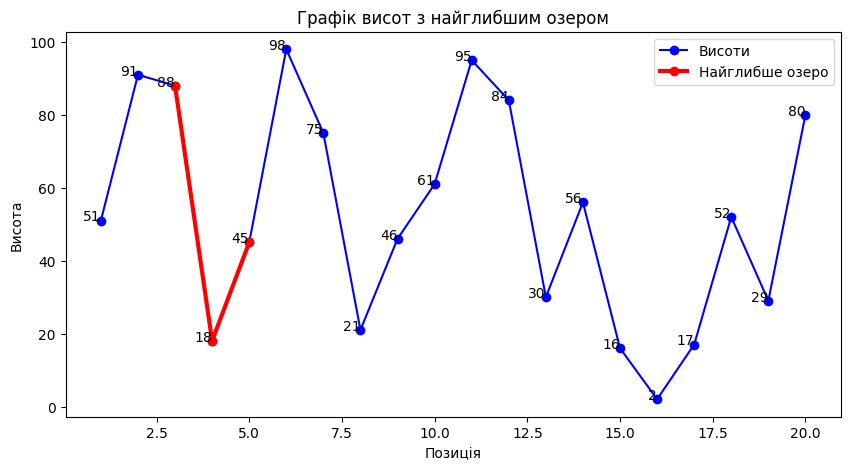

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(x, heights, marker='o', linestyle='-', color='blue', label='Висоти')

# Підсвічуємо найглибше озеро
if lake_indexes:
    i1, i2, i3 = lake_indexes
    plt.plot([i1+1, i2+1, i3+1], [heights[i1], heights[i2], heights[i3]], marker='o', linestyle='-', color='red', linewidth=3, label="Найглибше озеро")

for i, h in enumerate(heights):
    plt.text(i+1, h, str(h), fontsize=10, ha='right')

plt.xlabel("Позиція")
plt.ylabel("Висота")
plt.title("Графік висот з найглибшим озером")
plt.legend()
plt.show()

# Task 2


### Імпортування бібліотек

In [7]:
import numpy as np
import matplotlib.pyplot as plt

### Крок 1: Генерація матриці

Використаємо numpy для створення матриці:

In [8]:
# Генеруємо випадкову матрицю 20x20 з 0 та 1
matrix = np.random.randint(0, 2, (20, 20))

# Виводимо початкову матрицю
print(matrix)

[[0 1 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 0 1]
 [1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1]
 [1 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 1]
 [0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0]
 [0 0 1 0 0 0 1 1 0 1 1 0 1 0 1 1 0 1 0 1]
 [0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 0]
 [0 1 0 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 0]
 [0 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1]
 [1 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1]
 [1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0]
 [1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1]
 [0 0 0 1 1 1 1 0 0 1 1 1 0 1 0 1 0 1 0 1]
 [1 1 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0 1 1 1]
 [1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 0]
 [1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0]
 [0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1]
 [0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0]
 [0 1 1 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0]
 [1 1 0 0 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0]
 [1 0 1 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0]]


### Крок 2: Функція для підрахунку сусідів

Щоб визначити стан клітини в наступному поколінні, потрібно рахувати сусідів.

Реалізуємо функцію count_neighbors, яка рахує живі сусіди (1) навколо клітини:

In [9]:
def count_neighbors(matrix, x, y):
    neighbors = [
        (-1, -1), (-1, 0), (-1, 1),
        (0, -1),         (0, 1),
        (1, -1), (1, 0), (1, 1)
    ]
    count = 0
    rows, cols = matrix.shape

    for dx, dy in neighbors:
        nx, ny = x + dx, y + dy
        if 0 <= nx < rows and 0 <= ny < cols:  # Перевіряємо, чи не виходимо за межі
            count += matrix[nx, ny]

    return count


Тепер count_neighbors(matrix, 10, 10) поверне кількість сусідів для клітини в центрі.

### Крок 3: Алгоритм оновлення матриці

Створимо функцію update_matrix, яка:

* Створить нову копію матриці.

* Пройдеться по кожній клітинці.

* Оновить її стан за правилами.

Ця функція проходиться по всіх клітинах та змінює їх відповідно до правил.

In [10]:
def update_matrix(matrix):
    rows, cols = matrix.shape
    new_matrix = np.copy(matrix)  # Створюємо копію

    for i in range(rows):
        for j in range(cols):
            neighbors = count_neighbors(matrix, i, j)

            if matrix[i, j] == 1:  # Жива клітина
                if neighbors < 2 or neighbors > 3:
                    new_matrix[i, j] = 0  # Вмирає
            else:  # Мертва клітина
                if neighbors == 3:
                    new_matrix[i, j] = 1  # Оживає

    return new_matrix

### Крок 4: Запуск симуляції на 20 ітерацій

Запустимо оновлення матриці 20 разів:

In [11]:
matrix = np.random.randint(0, 2, (20, 20))

for step in range(20):
    matrix = update_matrix(matrix)

print("Фінальна матриця після 20 ітерацій:")
print(matrix)

Фінальна матриця після 20 ітерацій:
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0]
 [0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0]
 [0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1]
 [0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0]
 [0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0]]


Після 20 оновлень матриця зміниться відповідно до заданих правил.

### Крок 5: Візуалізація стану матриці

Щоб краще бачити зміни, використаємо matplotlib:

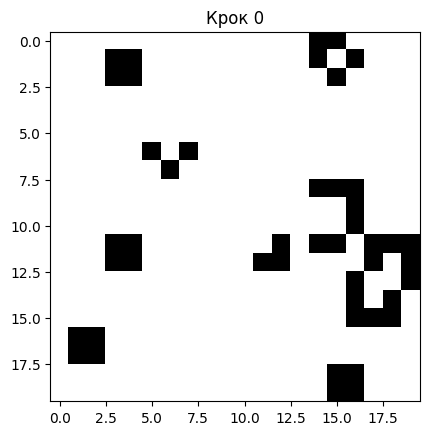

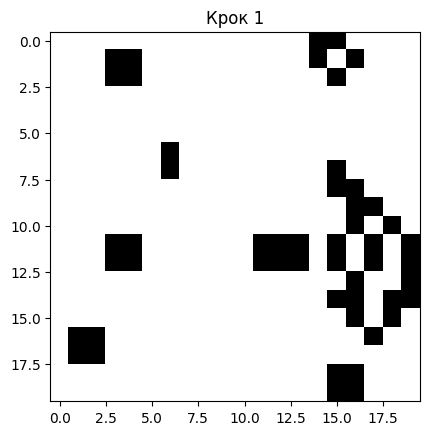

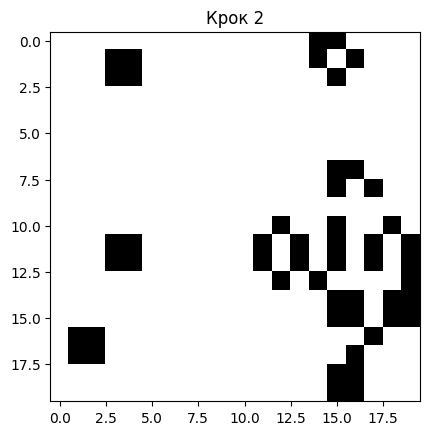

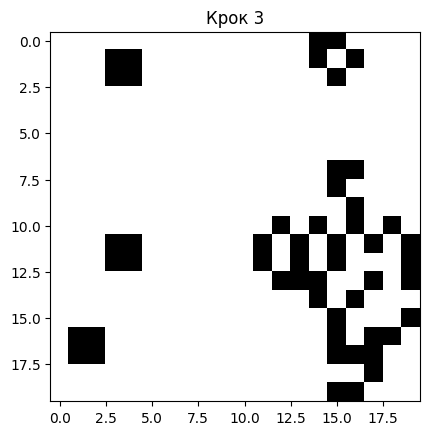

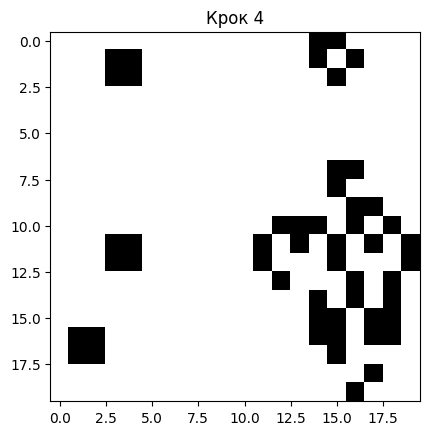

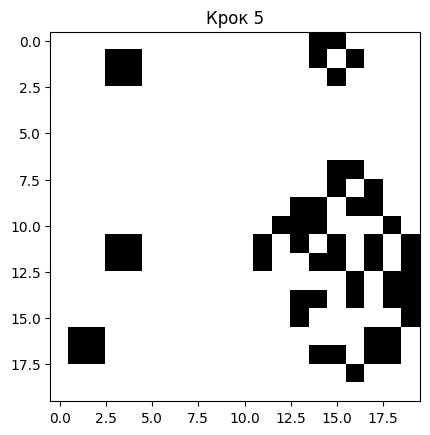

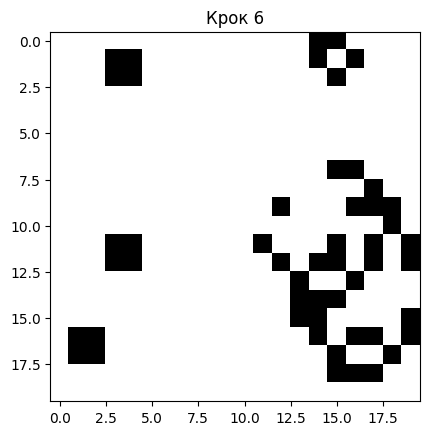

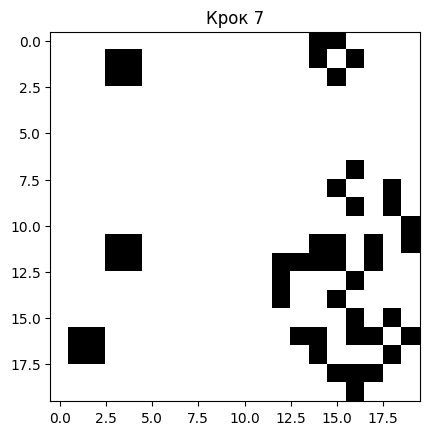

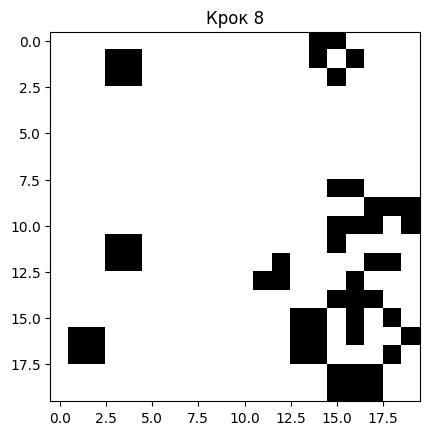

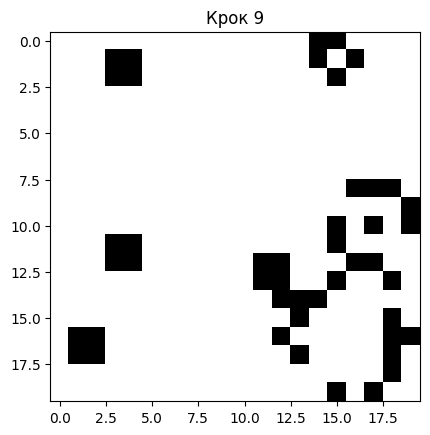

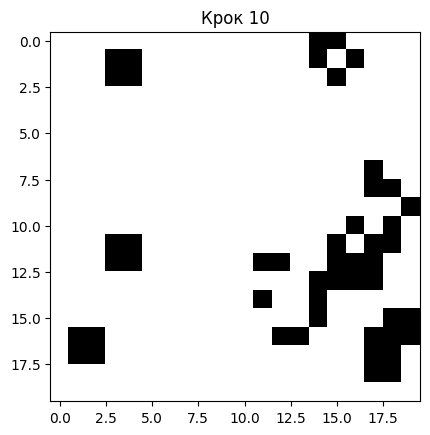

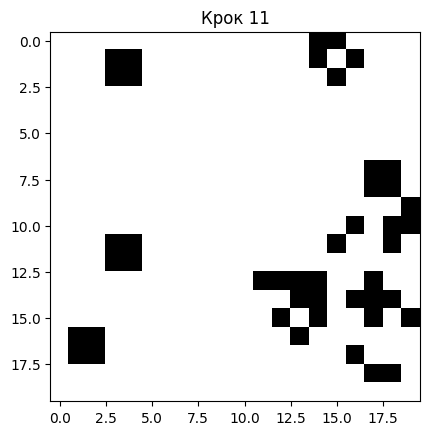

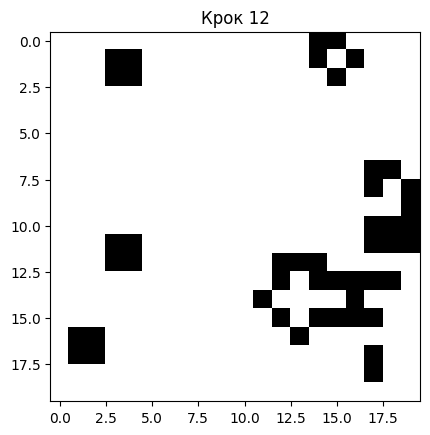

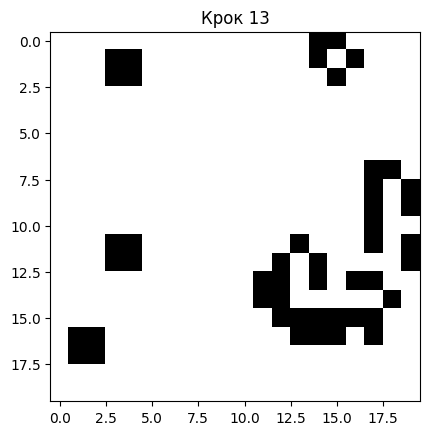

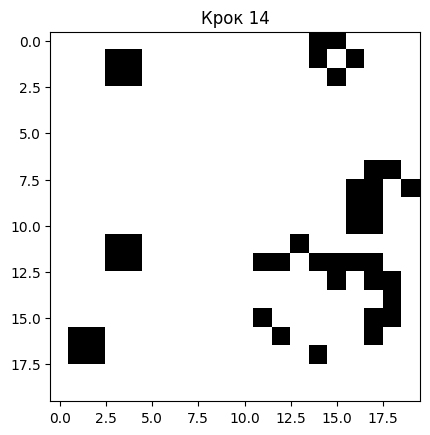

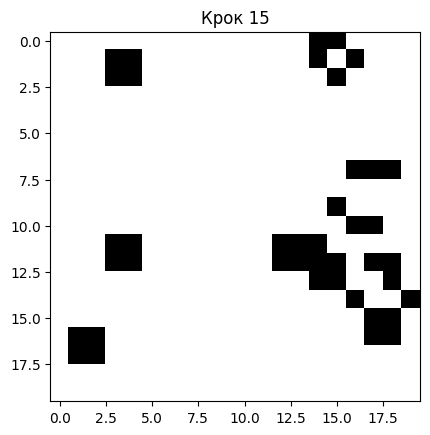

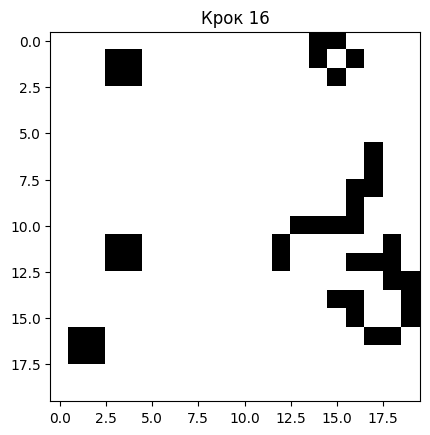

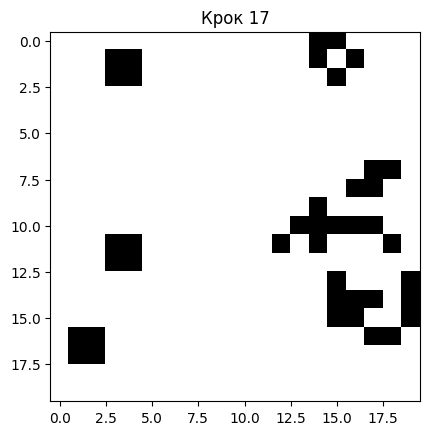

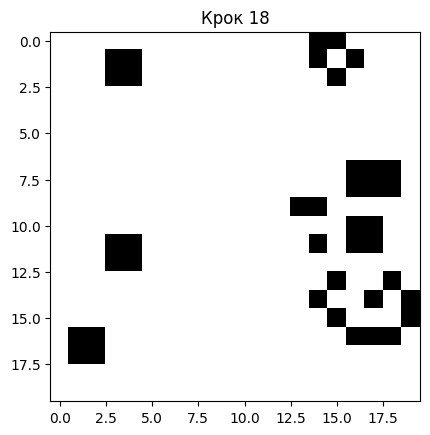

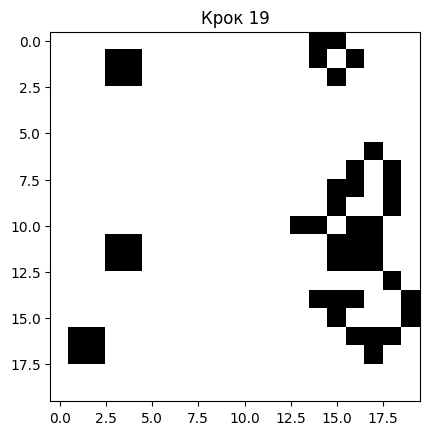

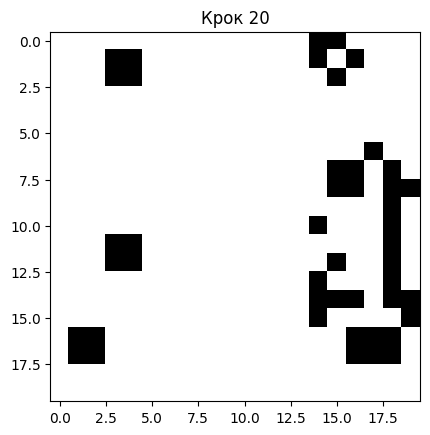

In [12]:
def plot_matrix(matrix, step):
    plt.imshow(matrix, cmap='Greys')  # Чорний = 1, Білий = 0
    plt.title(f"Крок {step}")
    plt.show()

# Відображаємо початковий стан
plot_matrix(matrix, 0)

# Запускаємо ітерації та візуалізуємо кожен крок
for step in range(1, 21):
    matrix = update_matrix(matrix)
    plot_matrix(matrix, step)


🔹 Що робить цей код?

Візуалізуємо matrix за допомогою imshow, де:

Чорний (1) — жива клітина.

Білий (0) — мертва клітина.

Виводимо 20 оновлених матриць, щоб бачити зміни.

# Task 3

### Крок 1: Початкова ймовірність "Н"

Ймовірність того, що випаде "H" перед першими підкиданнями:

𝑃(𝐻)=𝑃(𝑚<sub>1</sub>)𝑃(𝐻∣𝑚<sub>1</sub>)+𝑃(𝑚<sub>2</sub>)𝑃(𝐻∣𝑚<sub>2</sub>)+...+𝑃(𝑚<sub>5</sub>)𝑃(𝐻∣𝑚<sub>5</sub>)

Оскільки кожна монета обирається з рівною ймовірністю 𝑃(𝑚<sub>𝑖</sub>) 0.2, то:

𝑃(𝐻)=0.2⋅0.8+0.2⋅0.9+0.2⋅0.1+0.2⋅0.2+0.2⋅0.3

Розрахуємо в коді:

In [13]:
# Ймовірності герба для кожної монети
coin_probs = np.array([0.8, 0.9, 0.1, 0.2, 0.3])  # [P(H|m1), P(H|m2), ..., P(H|m5)]
prior_probs = np.full(5, 0.2)  # Початкові рівномірні ймовірності P(m1), ..., P(m5)

# Послідовність підкидань
flips = ['H', 'T', 'H', 'H', 'H', 'T', 'T', 'H', 'H']
prob_H_list = []

### Крок 2: Оновлення ймовірностей після кожного підкидання

Тепер будемо оновлювати ймовірності того, що обрана конкретна монета, після кожного кидка.

За теоремою Байєса:

𝑃(𝑚<sub>𝑖</sub>∣𝐻)=𝑃(𝐻∣𝑚<sub>𝑖</sub>)𝑃(𝑚<sub>𝑖</sub>)/𝑃(𝐻)

𝑃(𝑚<sub>𝑖</sub>∣𝑇)=𝑃(𝑇∣𝑚<sub>𝑖</sub>)𝑃(𝑚<sub>𝑖</sub>)/𝑃(𝑇)
 
Де:

* 𝑃(𝐻∣𝑚<sub>𝑖</sub>) – ймовірність отримати "H" для кожної монети.

* 𝑃(𝑇∣𝑚<sub>𝑖</sub>) = 1 - 𝑃(𝐻∣𝑚<sub>𝑖</sub>)

* 𝑃(𝐻) та 𝑃(𝑇) обчислюємо як повну ймовірність.

Створимо функцію для оновлення ймовірностей монет після кожного підкидання:

In [14]:
def update_probs(prior_probs, coin_probs, flip):
    """Оновлює ймовірності на основі нового підкидання"""
    likelihood = coin_probs if flip == 'H' else (1 - coin_probs)  # Ймовірність випавшого результату
    posterior = prior_probs * likelihood  # Байєсова ймовірність (не нормалізована)
    return posterior / posterior.sum()  # Нормалізація

# Виводимо початковий стан
print(f"Початкові ймовірності вибору монети: {prior_probs.round(4)}")
initial_P_H = np.sum(prior_probs * coin_probs)
print(f"Початкова ймовірність P(H) = {round(initial_P_H, 4)}\n")

Початкові ймовірності вибору монети: [0.2 0.2 0.2 0.2 0.2]
Початкова ймовірність P(H) = 0.46



### Крок 3: Виконання оновлення для 9 підкидань

Запускаємо оновлення після кожного кидка:

In [15]:
# Оновлюємо ймовірності після кожного підкидання
for i, flip in enumerate(flips, start=1):
    prior_probs = update_probs(prior_probs, coin_probs, flip)  # Оновлення ймовірностей монет
    P_H = np.sum(prior_probs * coin_probs)  # Оновлена P(H)
    prob_H_list.append(round(P_H, 2))  # Округлення до двох знаків

    # Виводимо проміжні результати
    print(f"Крок {i}: Випало '{flip}'")
    print(f"  Оновлені ймовірності вибору монети: {prior_probs.round(4)}")
    print(f"  Ймовірність P(H) після {i} підкидань = {round(P_H, 4)}\n")

Крок 1: Випало 'H'
  Оновлені ймовірності вибору монети: [0.3478 0.3913 0.0435 0.087  0.1304]
  Ймовірність P(H) після 1 підкидань = 0.6913

Крок 2: Випало 'T'
  Оновлені ймовірності вибору монети: [0.2254 0.1268 0.1268 0.2254 0.2958]
  Ймовірність P(H) після 2 підкидань = 0.4408

Крок 3: Випало 'H'
  Оновлені ймовірності вибору монети: [0.4089 0.2588 0.0288 0.1022 0.2013]
  Ймовірність P(H) після 3 підкидань = 0.6438

Крок 4: Випало 'H'
  Оновлені ймовірності вибору монети: [0.5082 0.3618 0.0045 0.0318 0.0938]
  Ймовірність P(H) після 4 підкидань = 0.7671

Крок 5: Випало 'H'
  Оновлені ймовірності вибору монети: [0.53   0.4245 0.0006 0.0083 0.0367]
  Ймовірність P(H) після 5 підкидань = 0.8187

Крок 6: Випало 'T'
  Оновлені ймовірності вибору монети: [0.5847 0.2342 0.0029 0.0365 0.1417]
  Ймовірність P(H) після 6 підкидань = 0.7286

Крок 7: Випало 'T'
  Оновлені ймовірності вибору монети: [0.431  0.0863 0.0096 0.1077 0.3654]
  Ймовірність P(H) після 7 підкидань = 0.5546

Крок 8: Випал

### Крок 4: Графік зміни ймовірностей

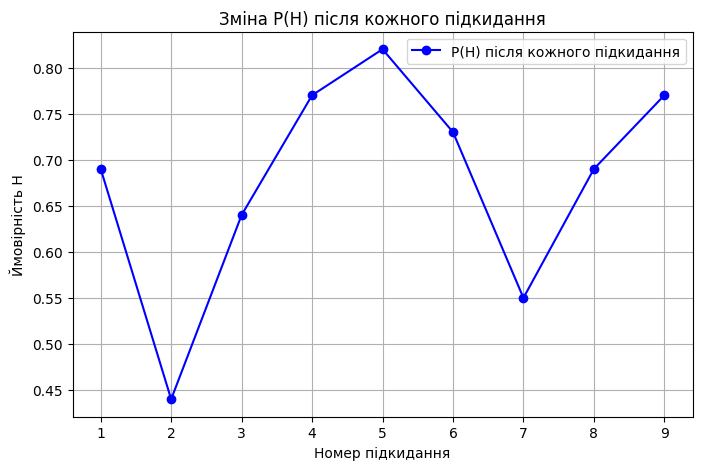


Список ймовірностей P(H): [0.69, 0.44, 0.64, 0.77, 0.82, 0.73, 0.55, 0.69, 0.77]


In [16]:
# Візуалізація зміни ймовірності випадання "H"

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Візуалізація зміни ймовірності випадання "H"
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(prob_H_list) + 1), prob_H_list, marker='o', linestyle='-', color='b', label="P(H) після кожного підкидання")
plt.xlabel("Номер підкидання")
plt.ylabel("Ймовірність H")
plt.title("Зміна P(H) після кожного підкидання")
plt.grid(True)
plt.legend()
plt.show()

# Вивід списку ймовірностей у відповідному форматі:
print(f"\nСписок ймовірностей P(H): {prob_H_list}")
